# missingno
* missingno 패키지는 pandas 데이터프레임에서 결측 데이터를 찾는 기능을 제공
* 데이터프레임에 결측 데이터가 NaN(not a number) 값으로 저장되어 있어야 한다.

> NaN값은 부동소수점 실수 자료형에만 있는 값이므로 정수 자료를 데이터프레임에 넣을 때는 Int64Dtype 자료형을 명시해주어야 하고 시간 자료형을 넣을 때도 parse_dates 인수로 날짜시간형 파싱을 해주어야 datetime64[ns] 자료형이 되어 결측 데이터가 NaT(not a time) 값으로 표시됨.

In [16]:
from io import StringIO
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

import matplotlib.pylab as plt

In [72]:
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

In [73]:
df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


> 판다스 데이터프레임 자체도 `isnull()` 또는 `isna()` 메서드로 사용하면<br> 결측 데이터의 위치를 알아내는 것이 가능

In [7]:
df.isnull()
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

`missingno` 패키지를 사용하면 대규모의 데이터에서도 결측 데이터에 대한 시각화를 쉽게 할 수 있다. <br>
* `matrix()` 함수는 결측 데이터를 시각화하는 명령이다. <br>결측된 데이터는 흰색으로, 그렇지 않은 데이터는 검은색으로 나타난다. <br> 
* 가장 오른쪽에 있는 것은 `스파크라인`(spark line)이라고 부르고, 각 행의 데이터 완성도를 표현한다.

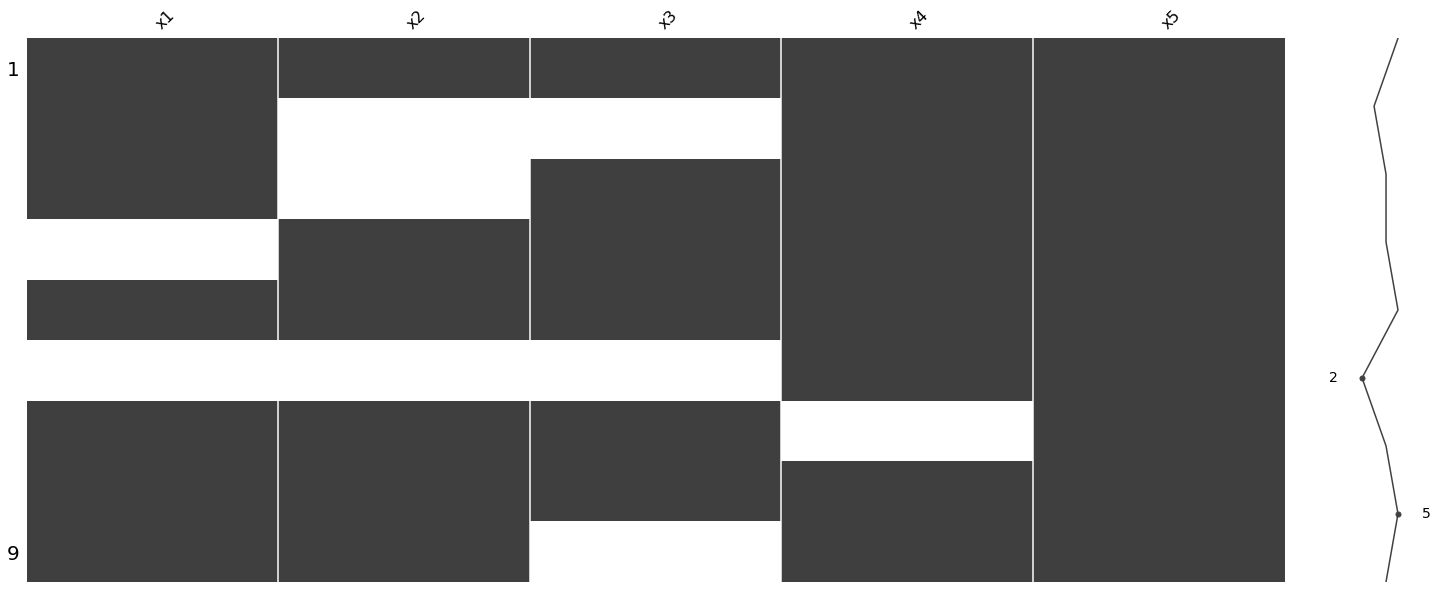

In [13]:
import missingno as msno

msno.matrix(df)
plt.show()

각 열에 결측 데이터가 얼마나 존재하는지 시각화 하고 싶다면, `bar()` 함수를 사용

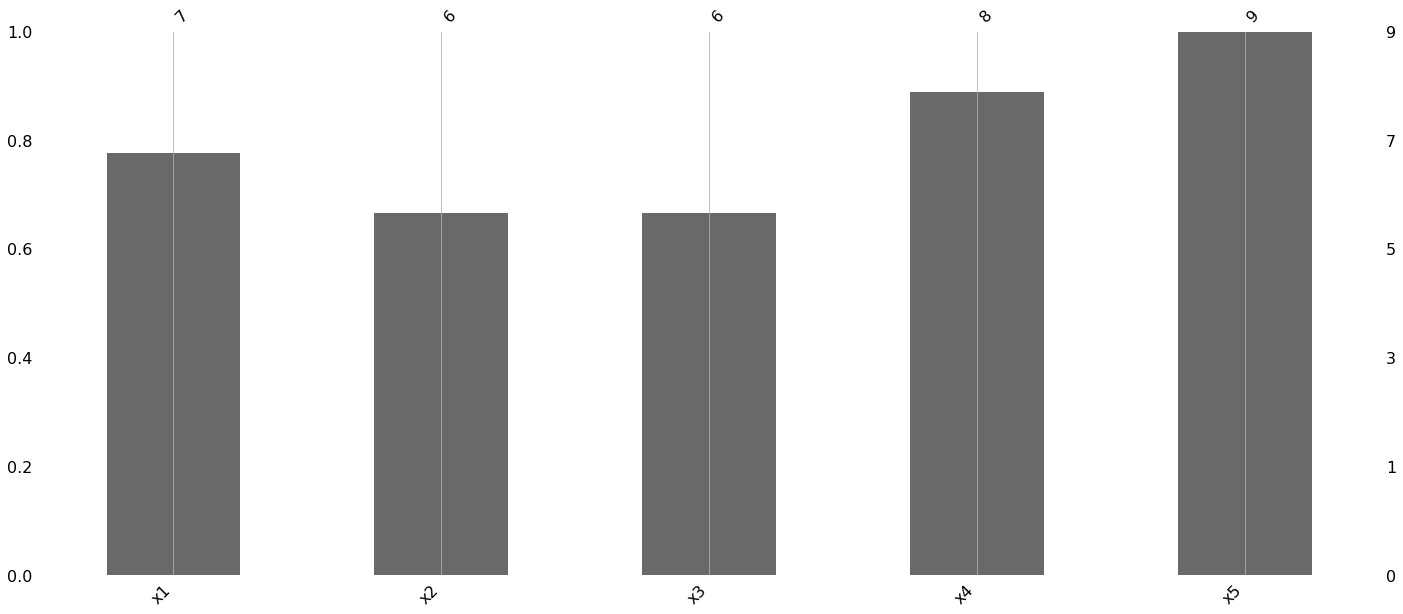

In [15]:
msno.bar(df)
plt.grid()
plt.show()

---

## Titanic data set

* survived : 생존 여부

* pclass : 승객의 클래스

* sex : 성별. male, female로 표기

* sibsp : 형제 혹은 자매의 수

* parch : 부모 혹은 자녀의 수

* fare : 탑승 요금

* embarked : 출발지의 고유 이니셜

* class : 선실의 클래스

* who : male, female을 man, woman으로 표기

* adult_male : 성인 남성 인지 아닌지 여부

* deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)

* embark_town : 출발지

* alive : 생존 여부 데이터를 yes 혹은 no로 표기

* alone : 가족이 없는 경우 True

In [17]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


<AxesSubplot:>

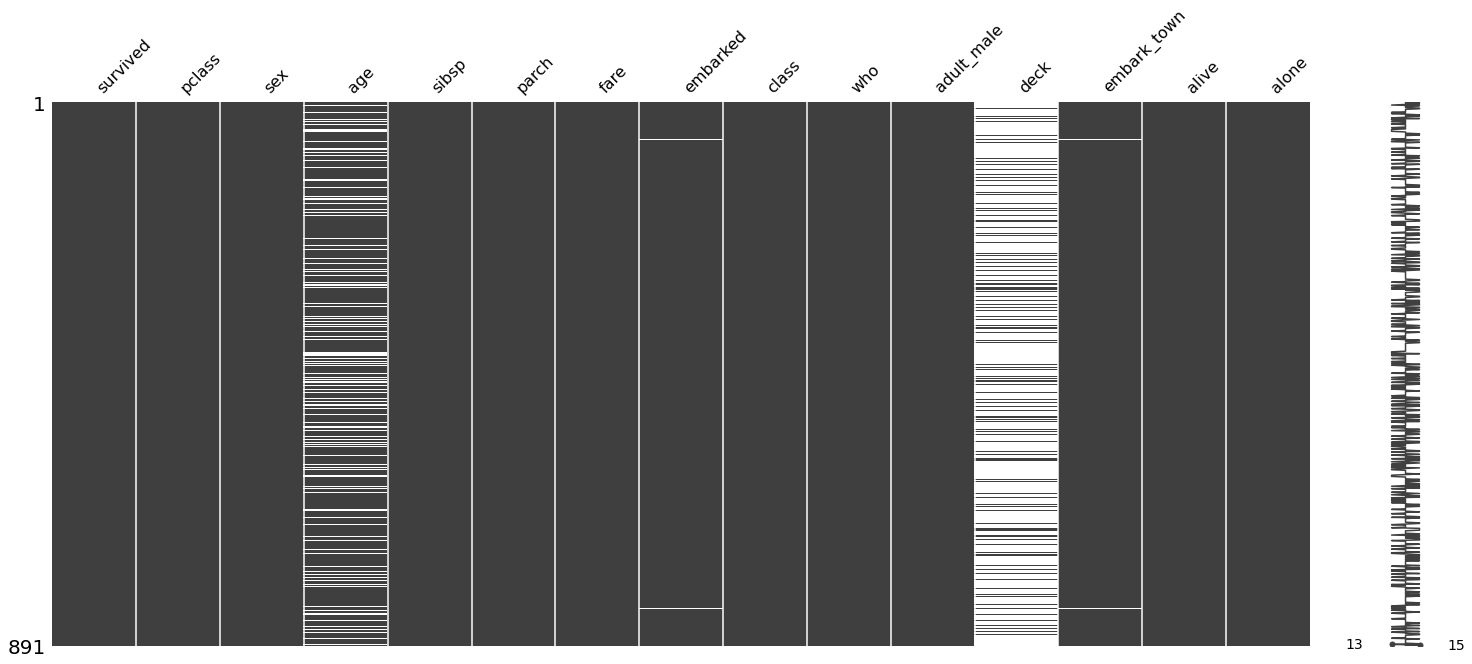

In [18]:
msno.matrix(titanic)

> age, deck, embarkd, embark_town 열 등에 결측 데이터가 있는 것을 볼 수 있다.

<AxesSubplot:>

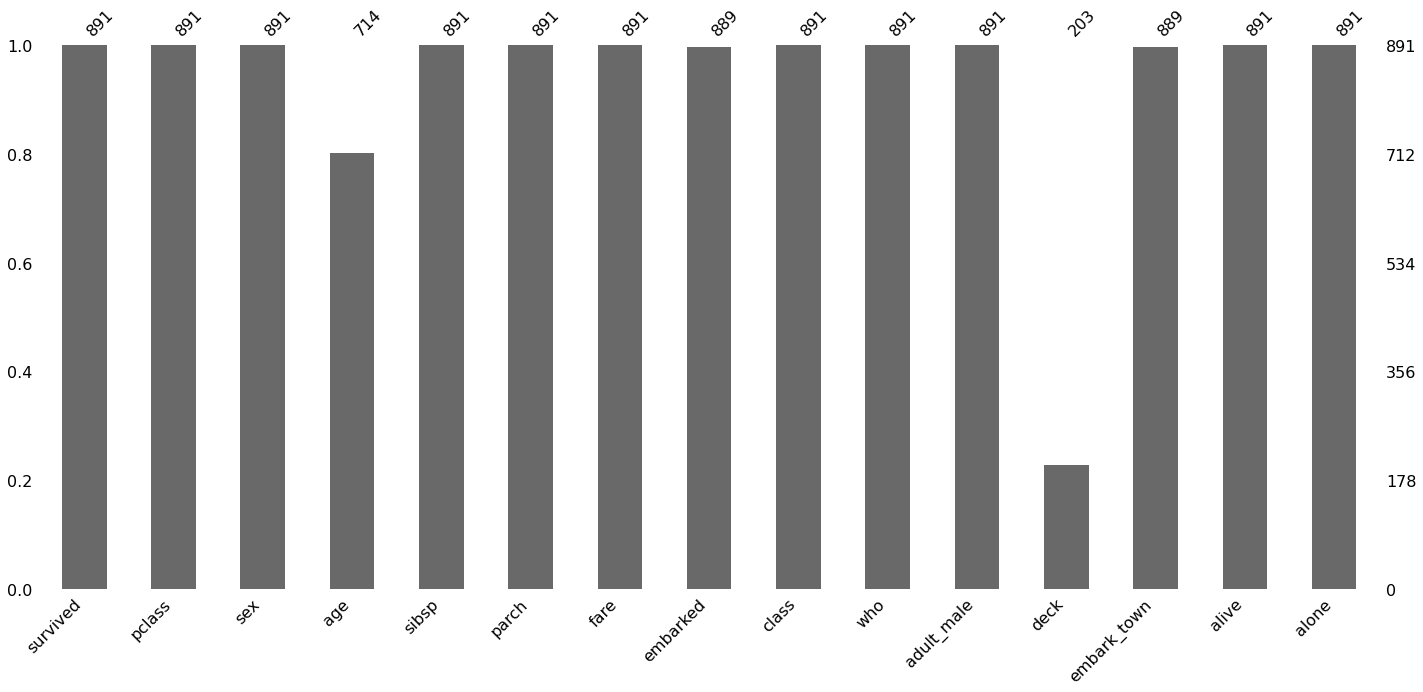

In [19]:
msno.bar(titanic)

### 결측 데이터 처리 방법
* 결측된 데이터가 너무 많은 경우 해당 데이터 열 전체를 삭제
* 결측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체
    * →이를 **결측 데이터 대체(imputation)** 라고 한다.

### `dropna()` 메서드
결측 데이터가 존재하는 행이나 열을 지울 수 있다. 

In [51]:
# 데이터프레임에서 결측데이터가 존재하는 모든 행 삭제
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [52]:
# axis 인수를 1로 설정하면 데이터가 있는 열을 제거
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


* `thresh` 인수를 사용하면 특정 갯수 이상의 비결측 데이터가 있는 행 또는 열만 남긴다.

In [53]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


> 타이타닉 데이터에서 deck 데이터는 결측값이 너무 많기 때문에 thresh 인수를 사용하여 삭제한다.

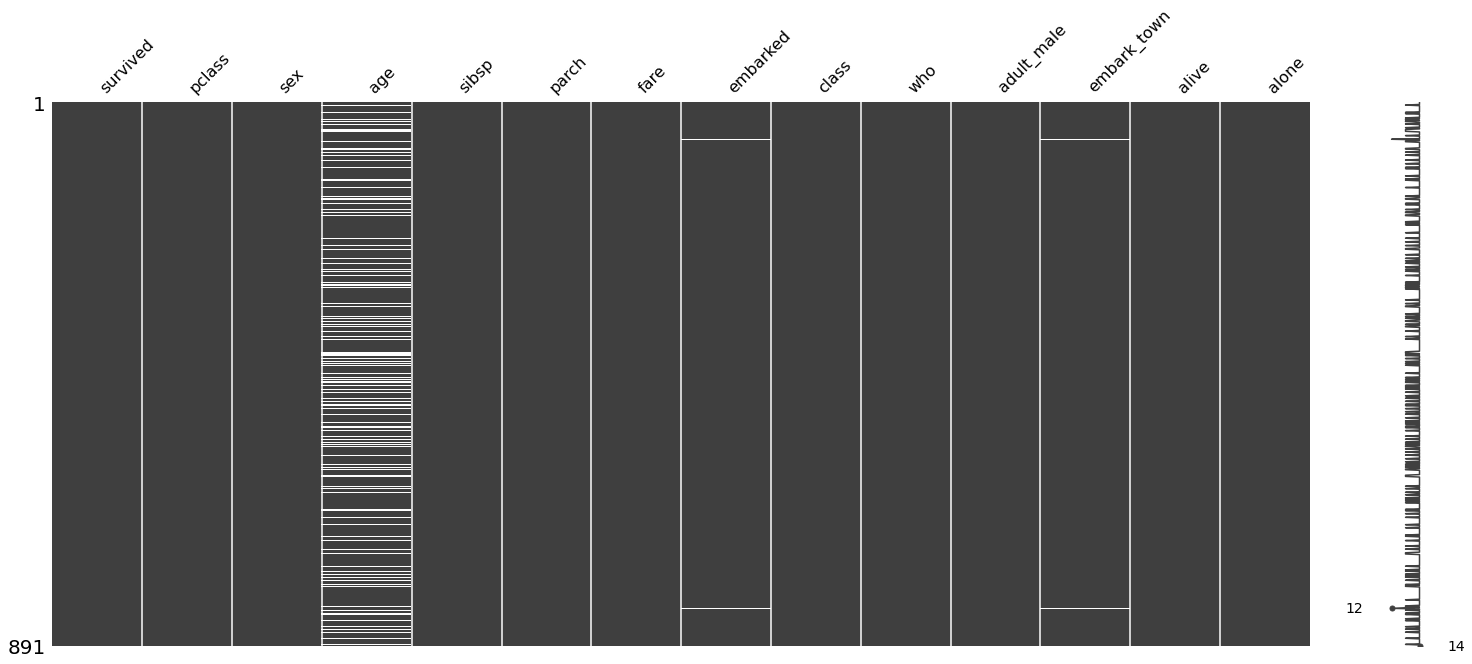

In [24]:
# 데이터가 절반 이상 없는 열 삭제
titanic = titanic.dropna(thresh=int(len(titanic)*0.5), axis = 1)
msno.matrix(titanic)
plt.show()

> 결측 데이터를 대체할 때, 해당 열의 비결측 데이터의 `평균값` 혹은 `중앙값` 등을 대체값으로 사용<br>
scikit-learn 패키지의 `SimpleImputer` 클래스를 사용하면 쉽게 결측 데이터를 대체할 수 있다.

#### 결측값 대체 방법
1. SimpleImputer 클래스 객체 생성
    * strategy 인수 : "mean": 평균값, "median": 중앙값, "most_frequent": 최빈값 대체<br>
2. fit_transform 메서드를 사용하여 대체값이 채워진 데이터프레임 생성

#### strategy 인수 선택 방법
1. 데이터가 실수 연속값인 경우 : 평균 또는 중앙값 사용. <br> 값의 분포가 **대칭적이면 평균**이 좋고, 분포가 심하게 **비대칭인 경우 중앙값**이 적당함
2. 데이터가 범주값이거나 정수값인 경우 : 최빈값 사용

---

In [79]:
import warnings
warnings.filterwarnings('ignore')

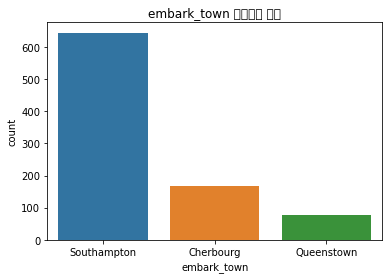

In [80]:
sns.countplot(titanic.embark_town)
plt.title("embark_town 데이터의 분포")
plt.show()

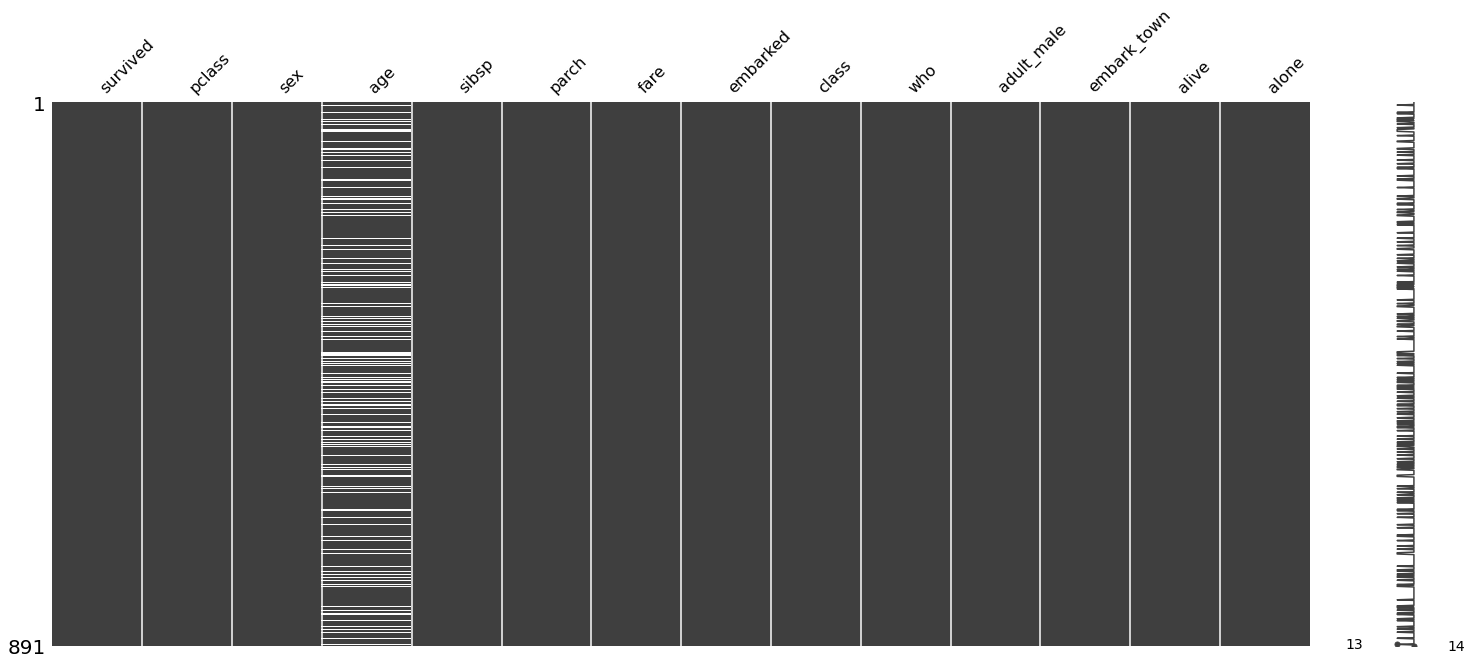

In [81]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

### age 데이터 분포
비대칭 분포를 확인할 수 있음

In [85]:
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

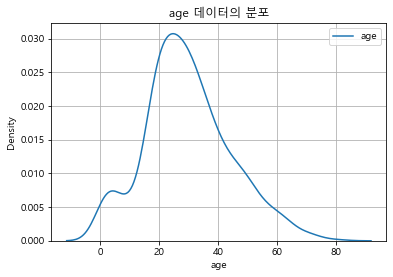

In [97]:
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.legend(['age'],loc='upper right')
plt.grid()
plt.show()

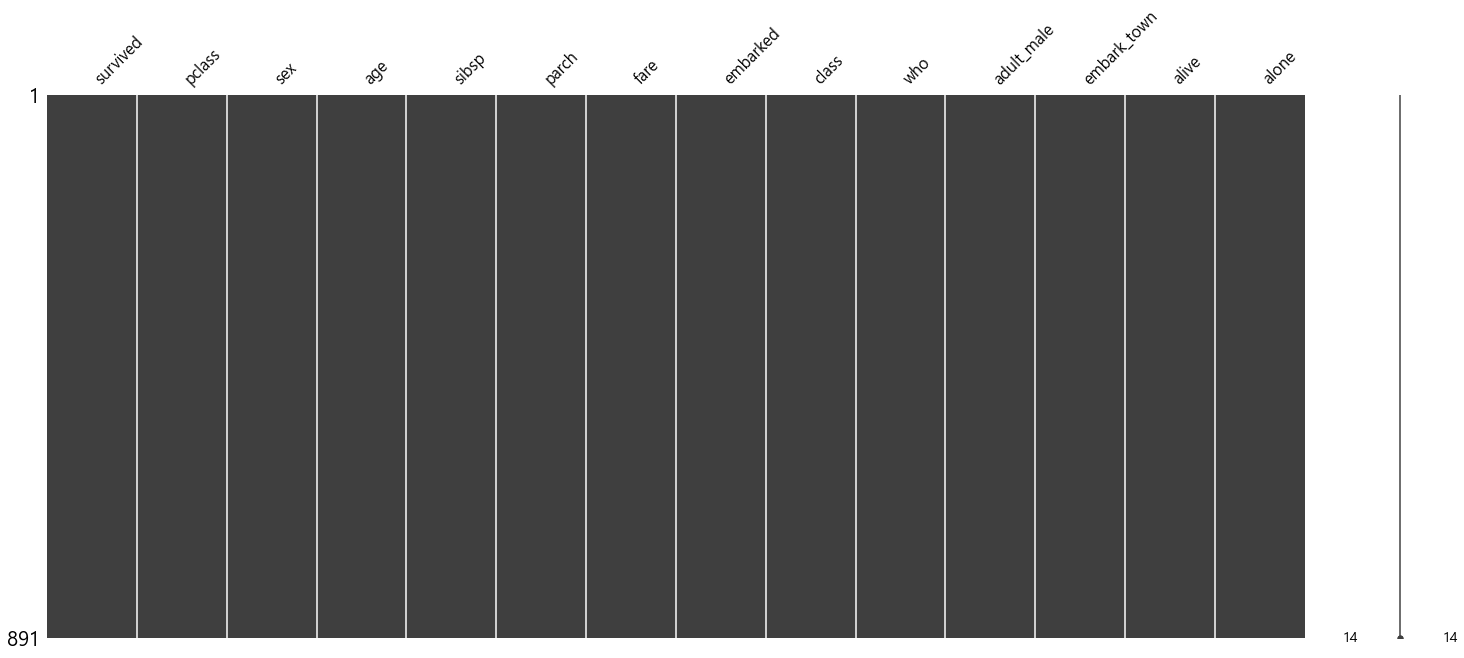

In [98]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

---